# Downscaled DTR

This notebook is for exploring downscaled daily temperature range data. We are specifically interested in DTR from GFDL-ESM4, because of the physically implausible tasmin values derived from tasmax - dtr, but other models exhibit some suspicious cold values as well.

In [1]:
import math
import os
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
from pathlib import Path
from xclim.core.units import convert_units_to
import matplotlib.pyplot as plt


zarr_dir = Path(
    os.getenv("ZARR_DIR", "/center1/CMIP6/kmredilla/cmip6_4km_downscaling/adjusted")
)
sim_dir = Path(
    os.getenv("CMIP6_DIR", "/center1/CMIP6/kmredilla/cmip6_4km_downscaling/cmip6_zarr")
)

In [13]:
model = "GFDL-ESM4"
scenario = "ssp585"


zarr_store = zarr_dir.joinpath(f"dtr_{model}_{scenario}_adjusted.zarr")
ds = xr.open_zarr(zarr_store)
dtr = ds["dtr"]
dtr.attrs["units"] = "°C"

In [18]:
ref_dir = Path("/center1/CMIP6/kmredilla/cmip6_4km_downscaling/era5_zarr")
era5_ds = xr.open_dataset(ref_dir.joinpath("dtr_era5.zarr"))

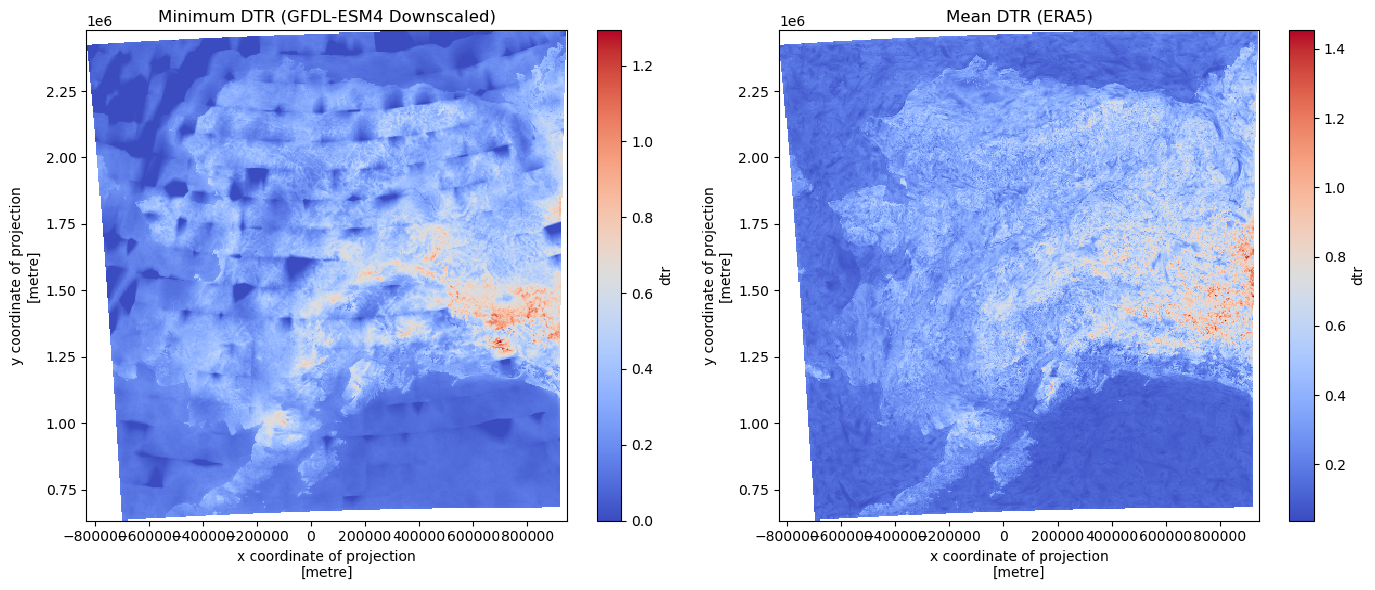

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot minimum DTR from downscaled data
dtr.min("time").plot(ax=ax[0], cmap="coolwarm")
ax[0].set_title("Minimum DTR (GFDL-ESM4 Downscaled)")

# Plot minimum DTR from ERA5 reference data
era5_ds["dtr"].min("time").plot(ax=ax[1], cmap="coolwarm")
ax[1].set_title("Mean DTR (ERA5)")

plt.tight_layout()
plt.show()

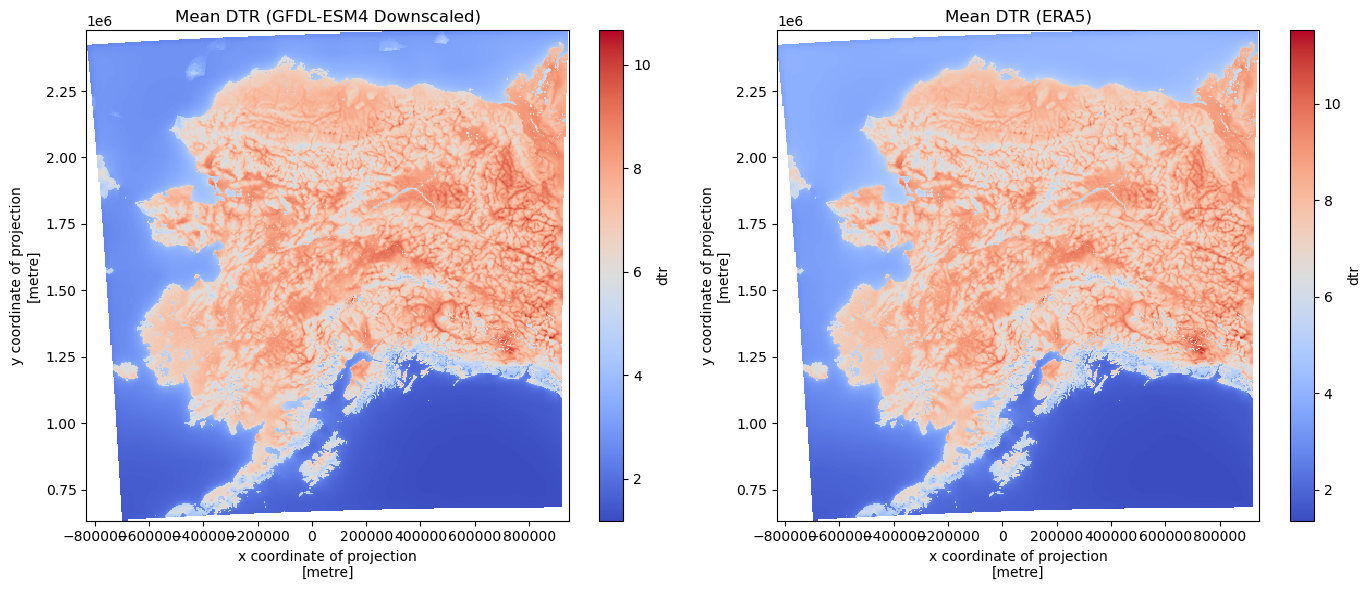

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot mean DTR from downscaled data
dtr.mean("time").plot(ax=ax[0], cmap="coolwarm")
ax[0].set_title("Mean DTR (GFDL-ESM4 Downscaled)")

# Plot mean DTR from ERA5 reference data
era5_ds["dtr"].mean("time").plot(ax=ax[1], cmap="coolwarm")
ax[1].set_title("Mean DTR (ERA5)")

plt.tight_layout()
plt.show()

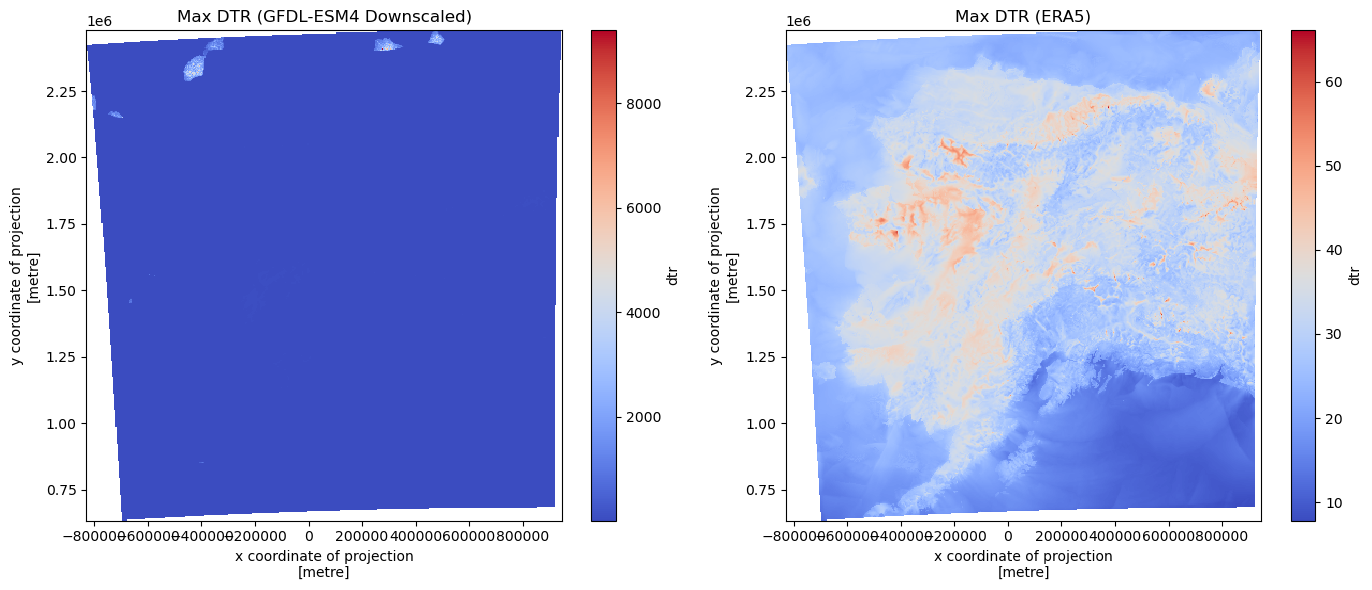

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot max DTR from downscaled data
dtr.max("time").plot(ax=ax[0], cmap="coolwarm")
ax[0].set_title("Max DTR (GFDL-ESM4 Downscaled)")

# Plot max DTR from ERA5 reference data
era5_ds["dtr"].max("time").plot(ax=ax[1], cmap="coolwarm")
ax[1].set_title("Max DTR (ERA5)")

plt.tight_layout()
plt.show()

Maximum ERA5 DTR is 66. 

In [24]:
era5_ds["dtr"].max().values

array(66.09098816)

Visualize DTR where it is less than 70:

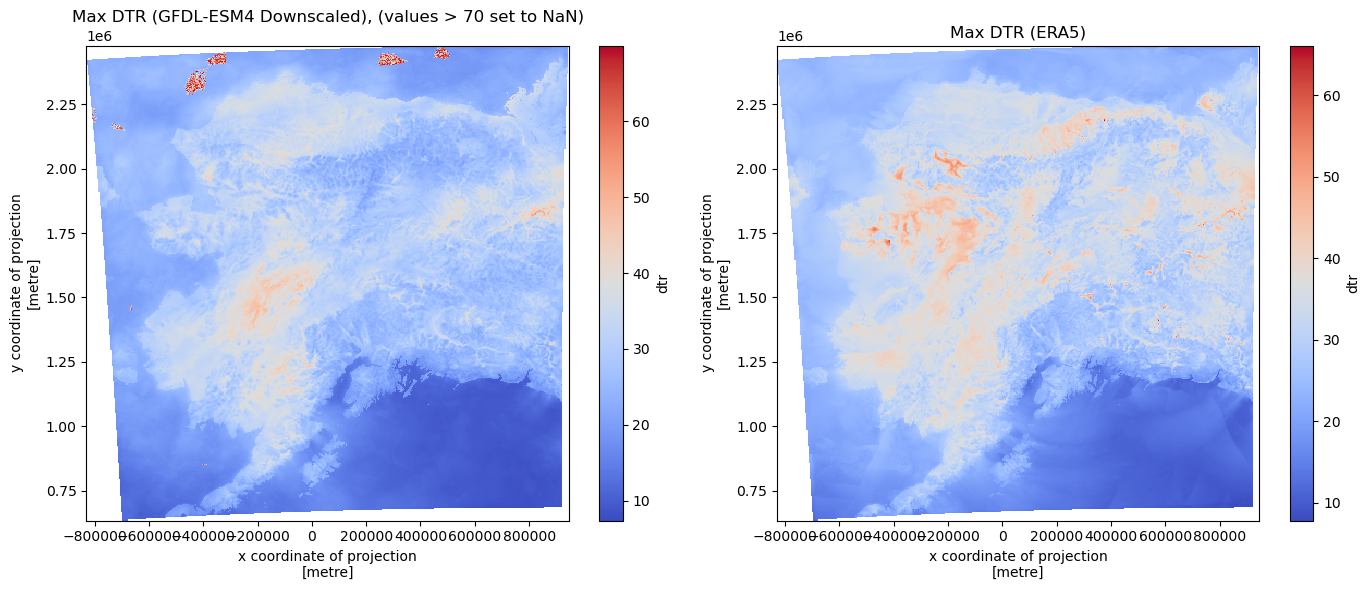

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot max DTR from downscaled data
dtr_masked = dtr.where(dtr <= 70)
dtr_masked.max("time").plot(ax=ax[0], cmap="coolwarm")
ax[0].set_title("Max DTR (GFDL-ESM4 Downscaled), (values > 70 set to NaN)")

# Plot max DTR from ERA5 reference data
era5_ds["dtr"].max("time").plot(ax=ax[1], cmap="coolwarm")
ax[1].set_title("Max DTR (ERA5)")

plt.tight_layout()
plt.show()